<a href="https://www.kaggle.com/code/filipkin/warsaw-flats?scriptVersionId=220559379" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/filipkin/warsaw-flats?scriptVersionId=220307056" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd
import scipy as sc

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Regular expressions
import re

# Math functions
import math

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Display utilities for Jupyter notebooks
from IPython.display import display

In [2]:
try:
    df = pd.read_csv("otodom_complete.csv", dtype={'id': 'Int64'})
except:
    df = pd.read_csv("/kaggle/input/warsaw-flat-rent-prices/otodom_complete.csv", dtype={'id': 'Int64'})

In [3]:
df.head()

,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,rest_info,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href
0,1612265907-2487,https://www.otodom.pl/wynajem/mieszkanie/warsz...,37 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-od-zar...,"Warszawa, Włochy, ul. 1 Sierpnia",2 100 zł,Kaucja:2 100 zł,Powierzchnia:37 m²,Liczba pokoi:2,NaN,...,klimatyzacja,Nr oferty w Otodom: 61451923,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 3 dni temu,NaN,NaN,NaN,NaN
1,1612264314-1965,https://www.otodom.pl/wynajem/mieszkanie/warsz...,38 m²\n \n ...,https://www.otodom.pl/pl/oferta/2-pokoje-tanio...,"Warszawa, Mokotów, ul. Suwak 11",1 825 zł,Kaucja:3 400 zł,Powierzchnia:38 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,garaż/miejsce parkingowewindapom. użytkowe,Nr oferty w Otodom: 61405987,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:350 zł,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN
2,1612263242-1616,https://www.otodom.pl/wynajem/mieszkanie/warsz...,57 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-mieszk...,"Warszawa, Bielany, ul. Kwitnąca",3 300 zł,Kaucja:3 300 zł,Powierzchnia:57 m²,Liczba pokoi:3,Rodzaj zabudowy:blok,...,balkontylko dla niepalącychoddzielna kuchnia,Nr oferty w Otodom: 61375474,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:1 zł,Data aktualizacji: 22 dni temu,NaN,NaN,NaN,NaN
3,1612265477-2346,https://www.otodom.pl/wynajem/mieszkanie/warsz...,63 m²\n \n ...,https://www.otodom.pl/pl/oferta/zielone-zacisz...,"Warszawa, Targówek, ul. św. Wincentego",2 200 zł,NaN,Powierzchnia:63 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,NaN,Nr oferty w Otodom: 61439492,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 5 dni temu,NaN,NaN,NaN,NaN
4,1612266187-2579,https://www.otodom.pl/wynajem/mieszkanie/warsz...,65 m²\n \n ...,https://www.otodom.pl/pl/oferta/eleganckie-mie...,"Warszawa, Ochota, Stara Ochota, ul. Juliana Ur...",3 000 zł,Kaucja:3 000 zł,Powierzchnia:65 m²,Liczba pokoi:3,Rodzaj zabudowy:kamienica,...,NaN,Nr oferty w Otodom: 61455072,NaN,NaN,NaN,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'offer_url',
       'offer_url-href', 'location', 'net_price', 'deposit', 'area',
       'room_num', 'build_type', 'floor', 'total_floor', 'build_mat',
       'windows', 'heating', 'year_built', 'status', 'agd', 'security',
       'add_info', 'rest_info', 'offer_ID', 'next_pagination',
       'next_pagination-href', 'add_cost', 'offer_last_update', 'second_page',
       'second_page-href', 'third_page', 'third_page-href'],
      dtype='object')

In [5]:
df.describe()

,next_pagination,second_page,third_page
count,0.0,137.0,41.0
mean,NaN,2.0,3.0
std,NaN,0.0,0.0
min,NaN,2.0,3.0
25%,NaN,2.0,3.0
50%,NaN,2.0,3.0
75%,NaN,2.0,3.0
max,NaN,2.0,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      3482 non-null   object 
 1   web-scraper-start-url  3482 non-null   object 
 2   offer_url              3482 non-null   object 
 3   offer_url-href         3482 non-null   object 
 4   location               3481 non-null   object 
 5   net_price              3481 non-null   object 
 6   deposit                3146 non-null   object 
 7   area                   3481 non-null   object 
 8   room_num               3481 non-null   object 
 9   build_type             3339 non-null   object 
 10  floor                  3401 non-null   object 
 11  total_floor            3045 non-null   object 
 12  build_mat              2239 non-null   object 
 13  windows                2899 non-null   object 
 14  heating                2998 non-null   object 
 15  year

In [7]:
df.shape

(3482, 30)

In [8]:
df.isna().sum()

web-scraper-order           0
web-scraper-start-url       0
offer_url                   0
offer_url-href              0
location                    1
net_price                   1
deposit                   336
area                        1
room_num                    1
build_type                143
floor                      81
total_floor               437
build_mat                1243
windows                   583
heating                   484
year_built               1014
status                    291
agd                        47
security                   90
add_info                  292
rest_info                1470
offer_ID                    1
next_pagination          3482
next_pagination-href     1014
add_cost                 1567
offer_last_update           1
second_page              3345
second_page-href         3345
third_page               3441
third_page-href          3441
dtype: int64

In [9]:
df[df['area'].isna()]



,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,rest_info,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href
131,1612263424-1676,https://www.otodom.pl/wynajem/mieszkanie/warsz...,50 m²\n \n ...,https://www.otodom.pl/pl/oferta/powisle-gornos...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def extract_number(text):
    match = re.search(r'(\d+)', text)
    return float(match.group(0)) if match else None
df.loc[df['area'].isna(), 'area'] = df.loc[df['area'].isna(), 'offer_url'].apply(lambda x: extract_number(x) if isinstance(x, str) else None)


In [11]:
df["offer_url-href"]

0       https://www.otodom.pl/pl/oferta/wynajme-od-zar...
1       https://www.otodom.pl/pl/oferta/2-pokoje-tanio...
2       https://www.otodom.pl/pl/oferta/wynajme-mieszk...
3       https://www.otodom.pl/pl/oferta/zielone-zacisz...
4       https://www.otodom.pl/pl/oferta/eleganckie-mie...
                              ...                        
3477    https://www.otodom.pl/pl/oferta/wynajme-mieszk...
3478    https://www.otodom.pl/pl/oferta/mieszkanie-2-p...
3479    https://www.otodom.pl/pl/oferta/2-pokoje-umebl...
3480    https://www.otodom.pl/pl/oferta/mieszkanie-1-p...
3481    https://www.otodom.pl/pl/oferta/mieszkanie-2-p...
Name: offer_url-href, Length: 3482, dtype: object

In [12]:
def find_rooms(url):
    if re.search(r"\bpokoje\b|\bpokojowe\b", url):
        return True
    return False

In [13]:
df["pokoj_url_mention"] = df["offer_url-href"].apply(find_rooms)

In [14]:
df["pokoj_url_mention"]

0        True
1        True
2       False
3        True
4       False
        ...  
3477    False
3478    False
3479     True
3480     True
3481     True
Name: pokoj_url_mention, Length: 3482, dtype: bool

In [15]:
# Filtracja DataFrame
brak_room_num = df[(df["pokoj_url_mention"] == True) & (df["room_num"].isna())]

# Wyświetlenie wyniku
brak_room_num


,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href,pokoj_url_mention
131,1612263424-1676,https://www.otodom.pl/wynajem/mieszkanie/warsz...,50 m²\n \n ...,https://www.otodom.pl/pl/oferta/powisle-gornos...,NaN,NaN,NaN,50.0,NaN,NaN,...,NaN,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,NaN,NaN,NaN,NaN,NaN,True


In [16]:
df[df['area'].isna()]

,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href,pokoj_url_mention


In [17]:
df.drop(["web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","third_page-href","web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","next_pagination","next_pagination-href","offer_last_update","second_page","second_page-href","third_page","third_page-href","offer_ID"], axis = 1, inplace = True)

In [18]:
columns_to_clean = ["deposit","room_num","area","total_floor","floor","net_price","year_built","add_cost"]
df[columns_to_clean] = df[columns_to_clean].apply(lambda col: col.str.replace(r'\D', '', regex=True))

In [19]:
df['location'] = df['location'].str.split(',').str[1].str.strip()

In [20]:
columns_to_clean1 = ["build_type","status","heating","windows","build_mat"]
df[columns_to_clean1] = df[columns_to_clean1].astype(str)
for col in columns_to_clean1:
    df[col] = df[col].str.split(pat=":", expand=True)[1] 

In [21]:
df

,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,heating,year_built,status,agd,security,add_info,rest_info,add_cost,pokoj_url_mention
0,Włochy,2100,2100,37,2,None,,4,None,plastikowe,None,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,domofon / wideofon,internet,klimatyzacja,NaN,True
1,Mokotów,1825,3400,38,2,blok,,NaN,pustak,plastikowe,miejskie,2020,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,domofon / wideofonmonitoring / ochrona,telewizja kablowainternet,garaż/miejsce parkingowewindapom. użytkowe,350,True
2,Bielany,3300,3300,57,3,blok,,15,wielka płyta,drewniane,miejskie,1984,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamaniowedomofon / wideofonm...,telewizja kablowainternet,balkontylko dla niepalącychoddzielna kuchnia,1,False
3,Targówek,2200,NaN,63,2,blok,4,5,cegła,drewniane,miejskie,2005,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,balkon,NaN,NaN,True
4,Ochota,3000,3000,65,3,kamienica,3,4,cegła,plastikowe,miejskie,1938,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,drzwi / okna antywłamanioweteren zamkniętydomo...,piwnicawindatylko dla niepalącychoddzielna kuc...,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,Praga-Południe,2000,2500,45,1,apartamentowiec,3,7,None,None,None,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,monitoring / ochrona,telewizja kablowainternettelefon,winda,350,False
3478,Wilanów,3300,3000,50,2,blok,1,2,cegła,plastikowe,miejskie,2006,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamanioweteren zamkniętydomo...,telewizja kablowainternet,balkonpiwnicagaraż/miejsce parkingowepom. użyt...,NaN,False
3479,Praga-Południe,2500,2500,4666,2,apartamentowiec,5,5,cegła,plastikowe,miejskie,2015,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,telewizja kablowainternettelefon,balkongaraż/miejsce parkingowewindatylko dla n...,NaN,True
3480,Praga-Północ,1300,1700,23,1,kamienica,,4,cegła,drewniane,kotłownia,1938,do zamieszkania,lodówkameblepralka,drzwi / okna antywłamaniowe,internet,tylko dla niepalących,270,True


In [22]:

columns_to_convert = ["net_price", "area","deposit","room_num","floor","total_floor","year_built","add_cost"]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [23]:
def fill_missing_build_type(df, columns_to_check=['offer_url', 'add_info', 'rest_info']):
    """
    Fill missing build_type values based on regex patterns found in specified columns.
    Only fills if value is missing and pattern is found.
    
    Args:
        df: DataFrame to process
        columns_to_check: List of columns to search for patterns
    Returns:
        DataFrame with filled build_type values
    """
    # Create a copy to avoid modifying the original dataframe
    df = df.copy()
    
    # Define building type patterns
    build_patterns = [
        (r'apartament|apartamentow', 'apartamentowiec'),
        (r'\bblok|bloku\b', 'blok'),
        (r'kamienic[ay]', 'kamienica'),
        (r'\bdom\b|\bdwor|rezydencj', 'dom'),
        (r'szereg|blizniak', 'szeregowiec')
    ]
    
    # Only process rows where build_type is missing
    mask = df['build_type'].isna()
    
    # For each row with missing value
    for idx in df[mask].index:
        # Combine all source columns' text for this row
        row_text = ' '.join(str(df.loc[idx, col]).lower() for col in columns_to_check if pd.notna(df.loc[idx, col]))
        
        # Check each pattern
        for pattern, value in build_patterns:
            if re.search(pattern, row_text):
                df.loc[idx, 'build_type'] = value
                break  # Stop after first match
                
    return df

# Example usage:
# df = fill_missing_build_type(df)

In [24]:
df.isna().sum()


location                1
net_price               1
deposit               336
area                    1
room_num                1
build_type            143
floor                 422
total_floor           437
build_mat            1243
windows               583
heating               484
year_built           1014
status                291
agd                    47
security               90
add_info              292
rest_info            1470
add_cost             1567
pokoj_url_mention       0
dtype: int64

In [25]:
# Define the list of columns to check
columns_to_check = ['add_info', 'rest_info', 'security', 'agd']

# Example list of common words to search for and remove
common_words = ['internet', 'balkon', 'piwnica',"telewizja kablowa","winda", "garaż/miejsce parkingowe","taras","ogródek","winda","telefon","oddzielna kuchnia",
                
                "pom. użytkowe","klimatyzacja","dwupoziomowe","tylko dla niepalących","wynajmę również studentom","zmywarka","lodówka","pralka","kuchenka","meble","piekarnik","telewizor"
               ,"drzwi / okna antywłamaniowe","monitoring","teren zamknięty","ochrona","domofon / wideofon", "system alarmowy", "rolety antywłamaniowe", "system alarmowy / rolety antywłamaniowe"
               ]  # Add more words as needed

# Step 1: Loop through each word in the common words list
for word in common_words:
    # Create a new flag column for each word (e.g., is_poddasze, is_internet, etc.)
    flag_column = f'is_{word}'
    df[flag_column] = df[columns_to_check].apply(lambda row: any(word in str(x).lower() for x in row), axis=1).astype(int)
    
    # Step 2: Remove the word from the specified columns
    for col in columns_to_check:
        df[col] = df[col].apply(lambda x: str(x).replace(word, '').strip() if pd.notna(x) else x)

# Display the updated dataframe
df.head()


,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,...,is_piekarnik,is_telewizor,is_drzwi / okna antywłamaniowe,is_monitoring,is_teren zamknięty,is_ochrona,is_domofon / wideofon,is_system alarmowy,is_rolety antywłamaniowe,is_system alarmowy / rolety antywłamaniowe
0,Włochy,2100.0,2100.0,37.0,2.0,None,NaN,4.0,None,plastikowe,...,1,1,0,0,0,0,1,0,0,0
1,Mokotów,1825.0,3400.0,38.0,2.0,blok,NaN,NaN,pustak,plastikowe,...,1,0,0,1,0,1,1,0,0,0
2,Bielany,3300.0,3300.0,57.0,3.0,blok,NaN,15.0,wielka płyta,drewniane,...,1,1,1,1,0,1,1,0,0,0
3,Targówek,2200.0,NaN,63.0,2.0,blok,4.0,5.0,cegła,drewniane,...,1,1,0,1,1,1,1,0,0,0
4,Ochota,3000.0,3000.0,65.0,3.0,kamienica,3.0,4.0,cegła,plastikowe,...,1,0,1,0,1,0,1,0,0,0


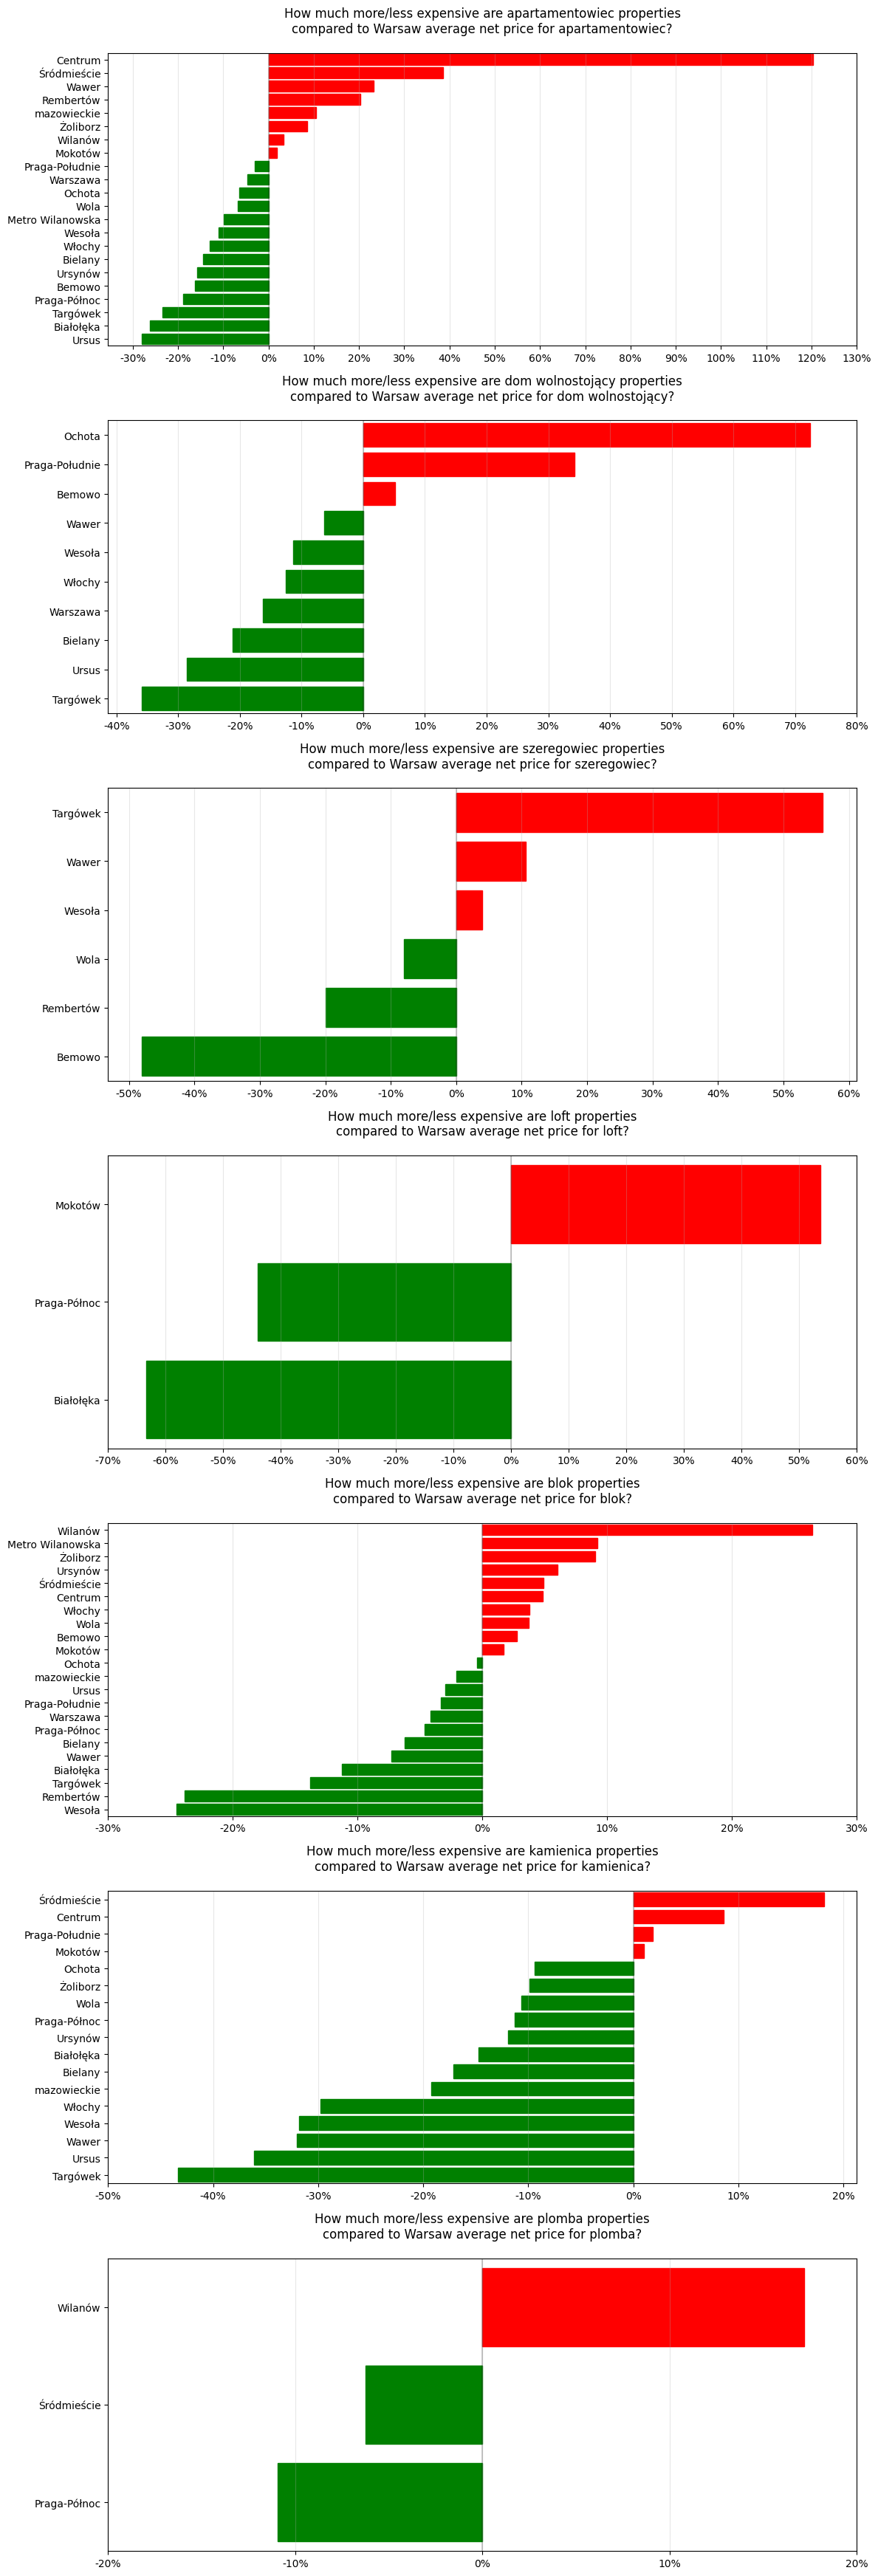

In [26]:
global_avg = df.groupby("build_type")["net_price"].mean()
local_avg = df.groupby(["location", "build_type"])["net_price"].mean()

def calc_percentage_diff(group_avg, global_avg):
    return ((group_avg - global_avg) / global_avg) * 100

# Restructure the data to make the calculation easier
result = pd.DataFrame(local_avg)
result = result.reset_index()

# Merge with global averages
result = result.merge(
    global_avg.reset_index().rename(columns={'net_price': 'global_avg'}),
    on='build_type'
)

# Calculate the percentage difference
result['price_diff_percent'] = round(calc_percentage_diff(
    result['net_price'],
    result['global_avg']
),2)

# Sort to see the biggest differences
result = result.sort_values('price_diff_percent', ascending=False)
result

# Get unique building types
build_types = result['build_type'].unique()

# Create a figure with subplots for each building type
fig, axes = plt.subplots(len(build_types), 1, figsize=(12, 5*len(build_types)))

# Create a plot for each building type
for idx, build_type in enumerate(build_types):
    # Filter data for current building type
    data = result[result['build_type'] == build_type]
    
    # Create horizontal bar plot
    bars = sns.barplot(data=data, y='location', x='price_diff_percent', ax=axes[idx])
    
    # Color the bars
    for i, bar in enumerate(bars.patches):
        if bar.get_width() > 0:
            bar.set_color('red')
        else:
            bar.set_color('green')
    
    # Set more specific title format for each subplot
    axes[idx].set_title(f'How much more/less expensive are {build_type} properties\ncompared to Warsaw average net price for {build_type}?', pad=20)
    axes[idx].axvline(x=0, color='black', linestyle='-', alpha=0.2)
    
    # Remove default labels
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')
    
    # Add grid for better readability
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Add more x-axis ticks
    max_value = data['price_diff_percent'].max()
    min_value = data['price_diff_percent'].min()
    # Create ticks every 10%
    ticks = np.arange(math.floor(min_value/10)*10, math.ceil(max_value/10)*10 + 10, 10)
    axes[idx].set_xticks(ticks)
    axes[idx].set_xticklabels([f'{x}%' for x in ticks])

plt.tight_layout()
plt.show()

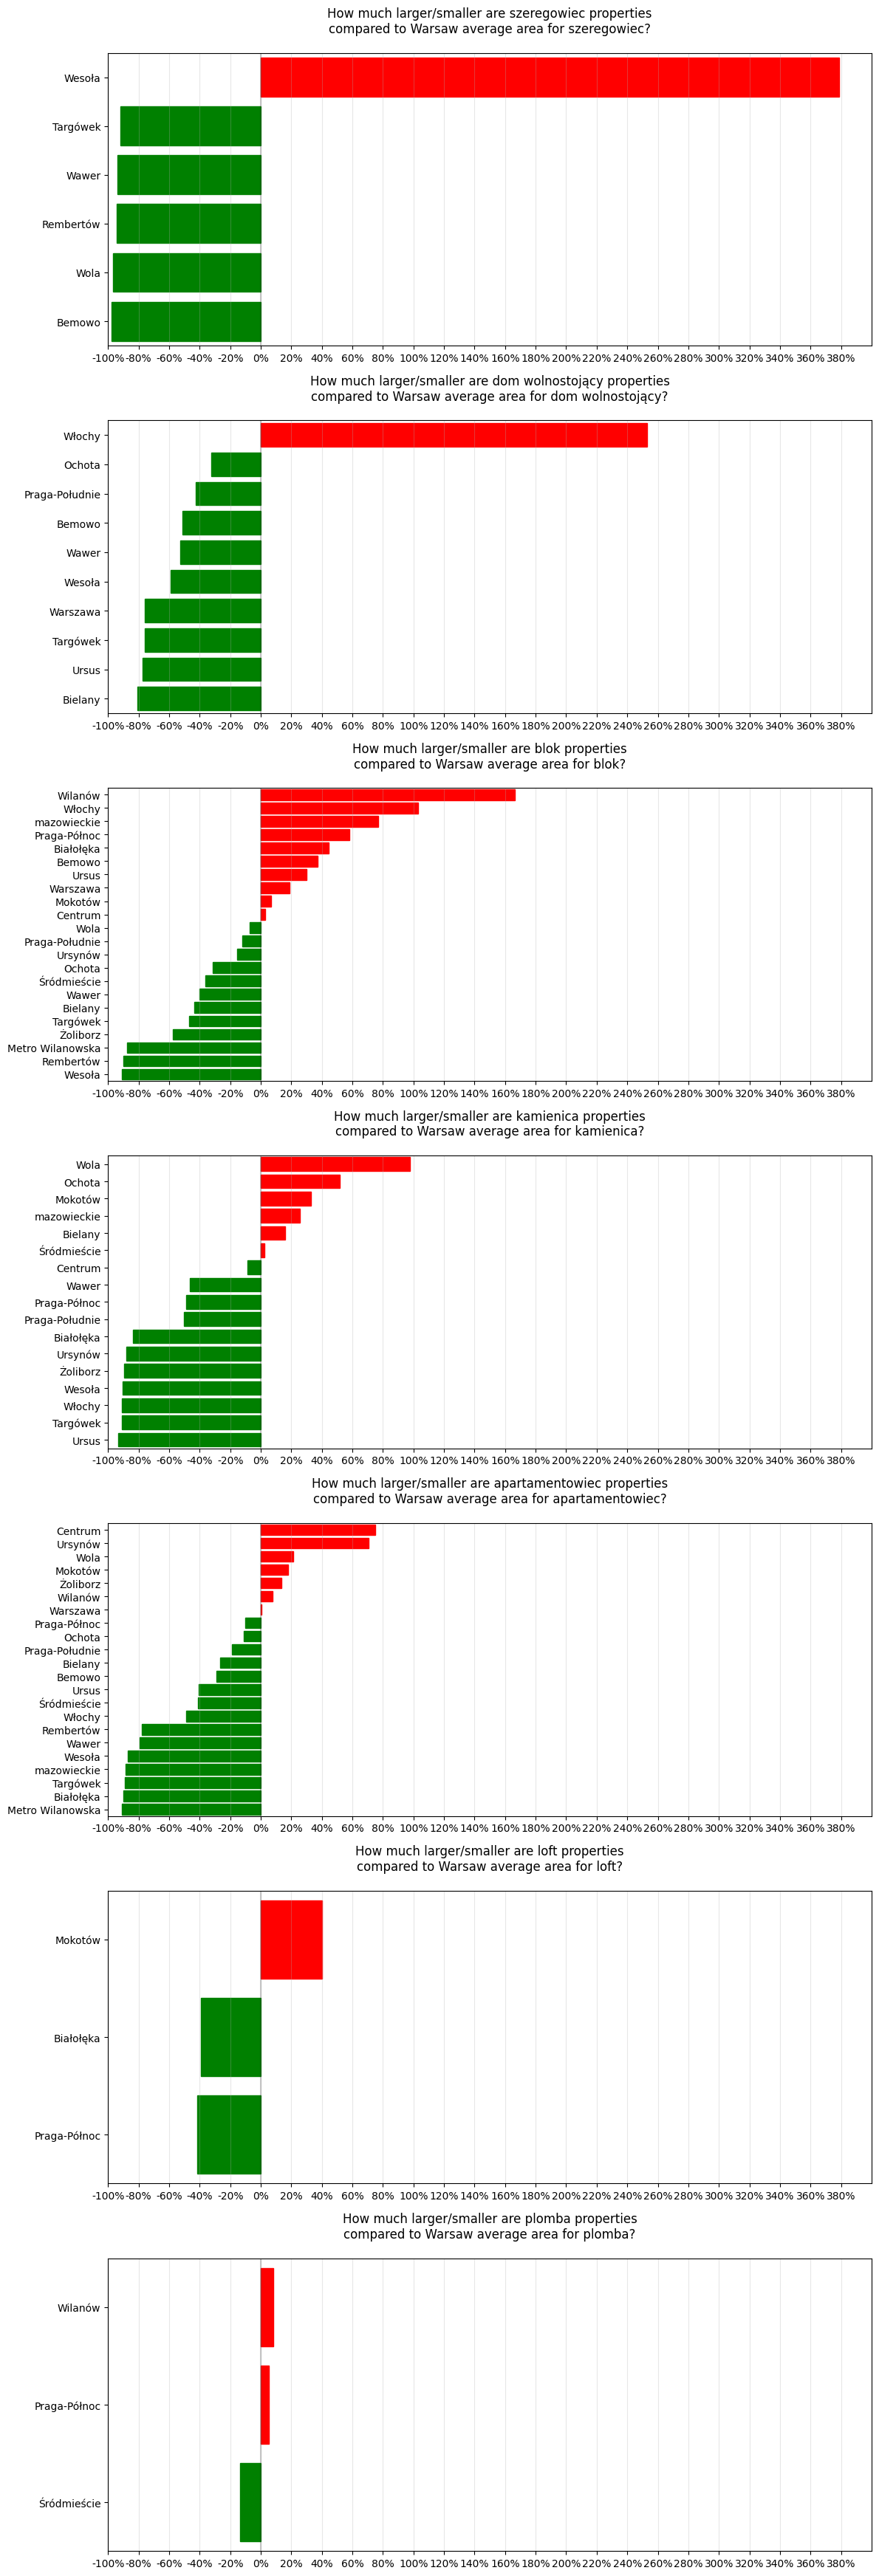

In [27]:
# Calculate averages for area instead of price
global_avg_area = df.groupby("build_type")["area"].mean()
local_avg_area = df.groupby(["location", "build_type"])["area"].mean()

def calc_percentage_diff(group_avg, global_avg):
    return ((group_avg - global_avg) / global_avg) * 100

# Restructure the data to make the calculation easier
result_area = pd.DataFrame(local_avg_area)
result_area = result_area.reset_index()

# Merge with global averages
result_area = result_area.merge(
    global_avg_area.reset_index().rename(columns={'area': 'global_avg'}),
    on='build_type'
)

# Calculate the percentage difference
result_area['area_diff_percent'] = round(calc_percentage_diff(
    result_area['area'],
    result_area['global_avg']
),2)

# Sort to see the biggest differences
result_area = result_area.sort_values('area_diff_percent', ascending=False)

# Get unique building types
build_types = result_area['build_type'].unique()

# Create a figure with subplots for each building type
fig, axes = plt.subplots(len(build_types), 1, figsize=(12, 5*len(build_types)))

# Create a plot for each building type
for idx, build_type in enumerate(build_types):
    # Filter data for current building type
    data = result_area[result_area['build_type'] == build_type]
    
    # Create horizontal bar plot
    bars = sns.barplot(data=data, y='location', x='area_diff_percent', ax=axes[idx])
    
    # Color the bars and add annotations
    for i, bar in enumerate(bars.patches):
        value = bar.get_width()
        if value > 0:
            bar.set_color('red')
            # Add annotation slightly to the right of the bar
        
        else:
            bar.set_color('green')
            # Add annotation slightly to the left of the bar
           
    # Set more specific title format for each subplot
    axes[idx].set_title(f'How much larger/smaller are {build_type} properties\ncompared to Warsaw average area for {build_type}?', pad=20)
    axes[idx].axvline(x=0, color='black', linestyle='-', alpha=0.2)
    
    # Remove default labels
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')
    
    # Add grid for better readability
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Create asymmetric ticks: -100 to 200 with 20% intervals
    negative_ticks = np.arange(-100, 0, 20)
    positive_ticks = np.arange(0, 400, 20)  # Extended to 200%
    ticks = np.concatenate([negative_ticks, positive_ticks])
    
    axes[idx].set_xticks(ticks)
    axes[idx].set_xticklabels([f'{int(x)}%' for x in ticks])
    
    # Set asymmetric x-axis limits
    axes[idx].set_xlim(-100, 400)  # Keep -100% on left but extend to 200% on right

plt.tight_layout()
plt.show()

In [28]:
# Calculate average differences for each location (across all building types)
price_summary = result.groupby('location')['price_diff_percent'].mean().round(1)
area_summary = result_area.groupby('location')['area_diff_percent'].mean().round(1)

# Combine into one dataframe
summary_df = pd.DataFrame({
    'Price Numeric': price_summary,
    'Area Numeric': area_summary
})

# Add formatted display columns
summary_df['Price Display'] = summary_df['Price Numeric'].apply(lambda x: f"{'+' if x > 0 else ''}{x}%")
summary_df['Area Display'] = summary_df['Area Numeric'].apply(lambda x: f"{'+' if x > 0 else ''}{x}%")

# First sort by area ascending, then by price descending
summary_df = summary_df.sort_values(['Area Numeric', 'Price Numeric'], 
                                  ascending=[True, False])

# Display with enhanced styling
display(summary_df[['Price Display', 'Area Display']].style
        .set_caption("Average Price and Area Differences by Location")
        .set_properties(**{
            'text-align': 'center',
            'border': '1px solid black',
            'padding': '8px'
        })
        .set_table_styles([
            {'selector': 'caption', 
             'props': [('text-align', 'center'), 
                      ('font-size', '16px'), 
                      ('font-weight', 'bold'),
                      ('padding', '10px')]},
            {'selector': 'th', 
             'props': [('text-align', 'center'), 
                      ('background-color', '#2c3e50'), 
                      ('color', 'white'),
                      ('font-weight', 'bold'),
                      ('border', '2px solid black'),
                      ('padding', '8px')]},
            {'selector': 'td', 
             'props': [('border', '1px solid black'),
                      ('padding', '8px')]},
            {'selector': '', 
             'props': [('border-collapse', 'collapse'),
                      ('border', '2px solid black'),
                      ('background-color', '#f8f9fa')]},
        ])
        .background_gradient(subset=['Price Display'], 
                           gmap=summary_df['Price Numeric'],
                           cmap='RdYlGn_r',  # Red for high prices (bad)
                           text_color_threshold=0.5,
                           vmin=-50,
                           vmax=50)
        .background_gradient(subset=['Area Display'], 
                           gmap=summary_df['Area Numeric'],
                           cmap='RdYlGn',    # Green for high areas (good)
                           text_color_threshold=0.5,
                           vmin=-50,
                           vmax=50))

,Price Display,Area Display
location,,
Metro Wilanowska,-0.3%,-89.2%
Rembertów,-7.9%,-87.4%
Targówek,-12.1%,-79.0%
Wawer,-2.4%,-62.5%
Ursus,-23.9%,-45.2%
Żoliborz,+2.5%,-44.6%
Białołęka,-28.9%,-41.9%
Bemowo,-14.1%,-35.2%
Bielany,-14.8%,-33.7%


In [29]:
df["add_info"].unique()

array(['', nan], dtype=object)

In [30]:
df["rest_info"].unique()


array(['', nan], dtype=object)

In [31]:
df["security"].unique()

array(['', '/', nan], dtype=object)

In [32]:
df["agd"].unique()

array(['', nan, '/'], dtype=object)

In [33]:
df.drop(["agd","security","rest_info","add_info"], axis = 1, inplace = True)

In [34]:
pd.get_dummies(df)

,net_price,deposit,area,room_num,floor,total_floor,year_built,add_cost,pokoj_url_mention,is_internet,...,windows_drewniane,windows_plastikowe,heating_elektryczne,heating_gazowe,heating_inne,heating_kotłownia,heating_miejskie,status_do remontu,status_do wykończenia,status_do zamieszkania
0,2100.0,2100.0,37.0,2.0,NaN,4.0,NaN,NaN,True,1,...,False,True,False,False,False,False,False,False,False,True
1,1825.0,3400.0,38.0,2.0,NaN,NaN,2020.0,350.0,True,1,...,False,True,False,False,False,False,True,False,False,True
2,3300.0,3300.0,57.0,3.0,NaN,15.0,1984.0,1.0,False,1,...,True,False,False,False,False,False,True,False,False,True
3,2200.0,NaN,63.0,2.0,4.0,5.0,2005.0,NaN,True,0,...,True,False,False,False,False,False,True,False,False,True
4,3000.0,3000.0,65.0,3.0,3.0,4.0,1938.0,NaN,False,0,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,2000.0,2500.0,45.0,1.0,3.0,7.0,NaN,350.0,False,1,...,False,False,False,False,False,False,False,False,False,True
3478,3300.0,3000.0,50.0,2.0,1.0,2.0,2006.0,NaN,False,1,...,False,True,False,False,False,False,True,False,False,True
3479,2500.0,2500.0,4666.0,2.0,5.0,5.0,2015.0,NaN,True,1,...,False,True,False,False,False,False,True,False,False,True
3480,1300.0,1700.0,23.0,1.0,NaN,4.0,1938.0,270.0,True,1,...,True,False,False,False,False,True,False,False,False,True


In [35]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)
df.drop(categorical_columns, axis = 1, inplace = True)

Categorical columns: Index(['location', 'build_type', 'build_mat', 'windows', 'heating', 'status'], dtype='object')


In [36]:
imp = SimpleImputer(missing_values =np.nan, strategy ='mean')

In [37]:
imputed_df = pd.DataFrame(imp.fit_transform(df), columns = df.columns)

In [38]:
columns_to_clean = [imputed_df.columns]
for col in columns_to_clean:
    imputed_df[col] = imputed_df[col].replace(['', '/'], pd.NA)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='deposit', ylabel='Count'>

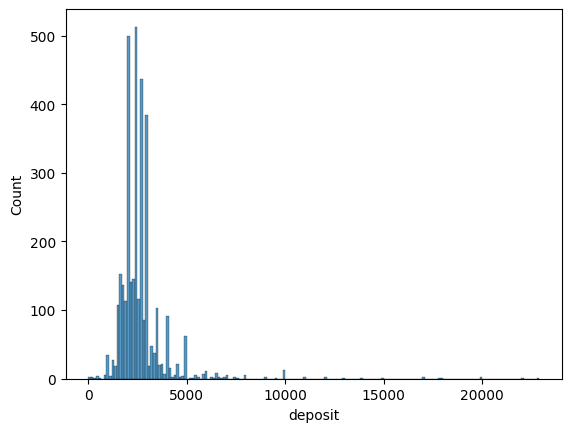

In [39]:
sns.histplot(data = imputed_df, x = "deposit")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 30000.0)

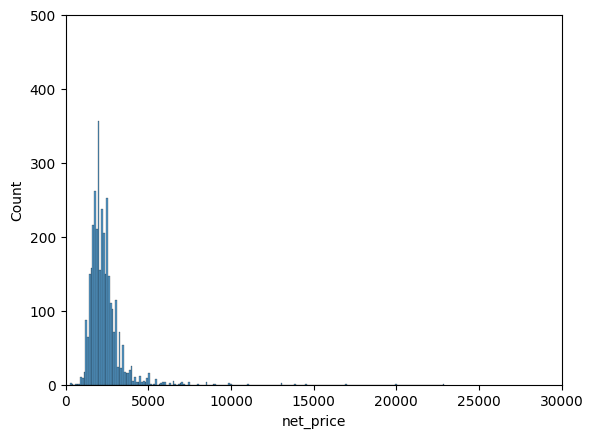

In [40]:
sns.histplot(data = imputed_df, x = "net_price")
plt.ylim(0, 500)
plt.xlim(0,30000)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 5000.0)

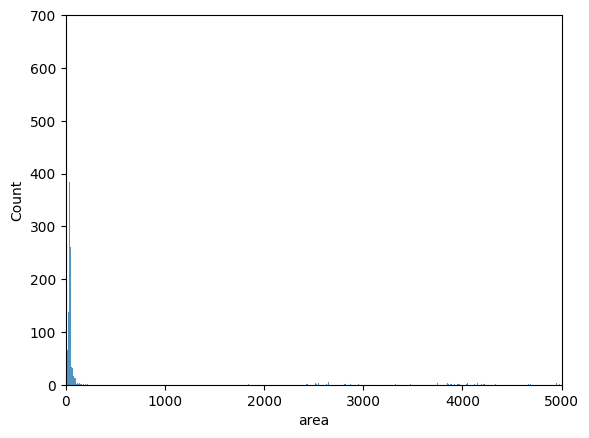

In [41]:
sns.histplot(data = imputed_df, x = "area", stat = "count")
plt.ylim(0, 700)
plt.xlim(0,5000)

<Axes: xlabel='net_price'>

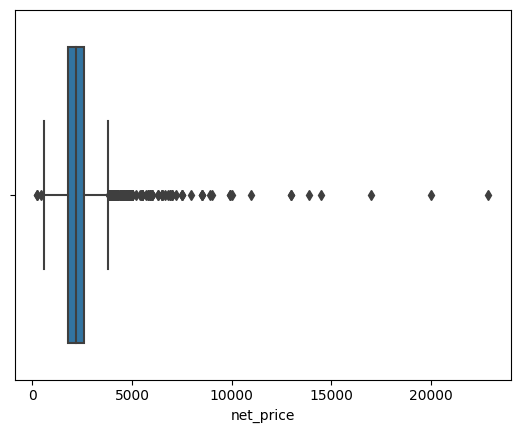

In [42]:
sns.boxplot(x = imputed_df["net_price"])

<Axes: xlabel='area'>

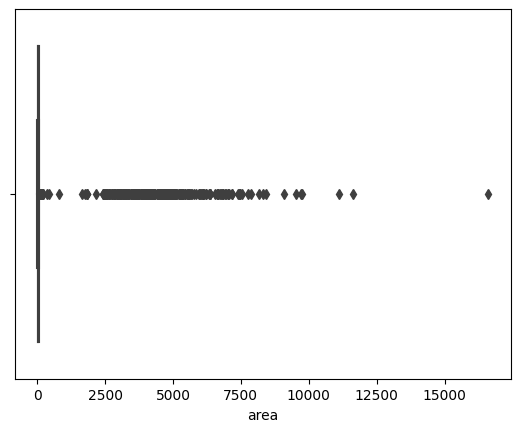

In [43]:
sns.boxplot(x = imputed_df["area"])